# Liver Disease Prediction using Machine Learning

**Course:** CU6051NI – Artificial Intelligence  
**Student Name:** Pranay Shakya  
**London Met ID:** 23050330  

## Algorithms Used
- K-Nearest Neighbor (KNN)
- Logistic Regression
- Random Forest
- XGBoost


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [54]:
df = pd.read_csv("liver_disease_dataset.csv")
print("Dataset loaded:", df.shape)

Dataset loaded: (18011, 10)


In [55]:
df.replace("NA", np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

In [56]:
target_column = "status"

In [57]:
df.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,83.6,169.0,28.828876,1871.0,1836,1


In [58]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [60]:
scaler = StandardScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [63]:
results = {}

In [64]:
for name, model in models.items():
    if name in ["KNN", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [16:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [65]:
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n")
print(results_df)


Model Performance:

                     Accuracy    Recall  F1 Score
KNN                  0.928948  0.168459  0.268571
Logistic Regression  0.928115  0.129032  0.217523
Random Forest        0.933111  0.229391  0.346883
XGBoost              0.932556  0.286738  0.397022


In [66]:
best_model = models["XGBoost"]
y_pred_best = best_model.predict(X_test)

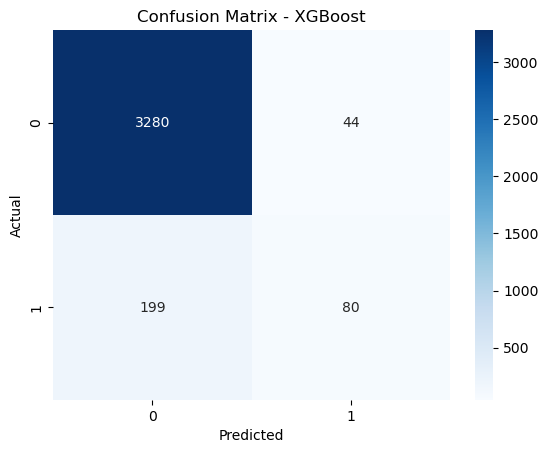

In [67]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

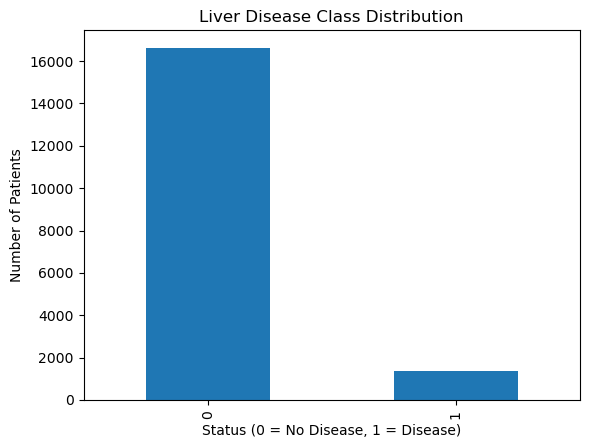

In [68]:
plt.figure()
df["status"].value_counts().plot(kind="bar")
plt.title("Liver Disease Class Distribution")
plt.xlabel("Status (0 = No Disease, 1 = Disease)")
plt.ylabel("Number of Patients")
plt.show()

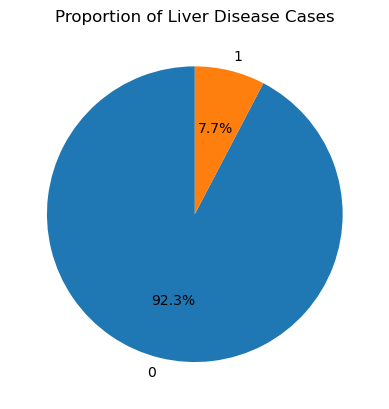

In [69]:
plt.figure()
df["status"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Liver Disease Cases")
plt.ylabel("")
plt.show()


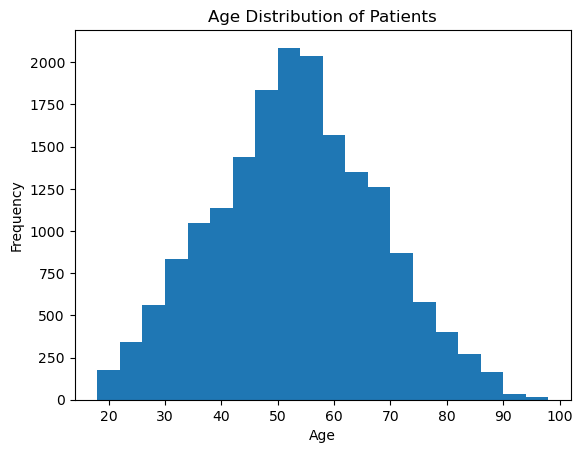

In [70]:
plt.figure()
plt.hist(df["age"], bins=20)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


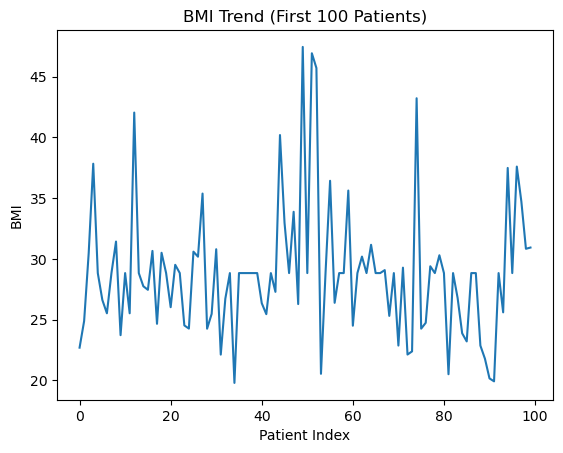

In [71]:
plt.figure()
plt.plot(df["bmi"].head(100))
plt.title("BMI Trend (First 100 Patients)")
plt.xlabel("Patient Index")
plt.ylabel("BMI")
plt.show()


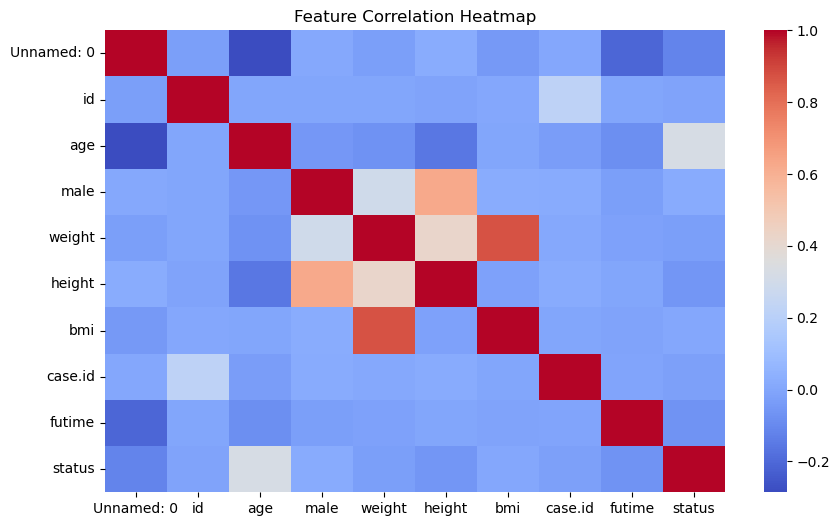

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


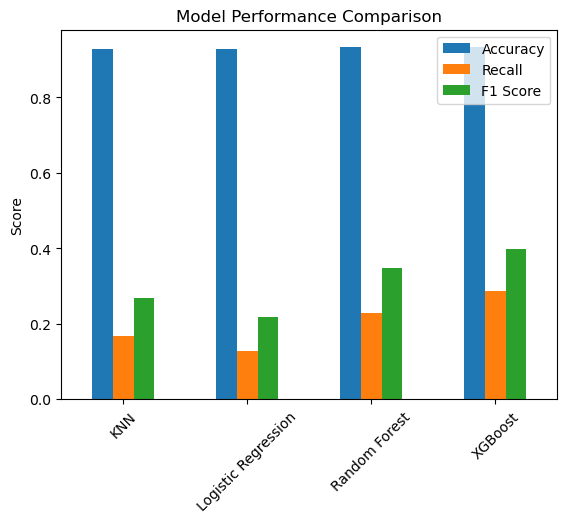

In [73]:
results_df.plot(kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


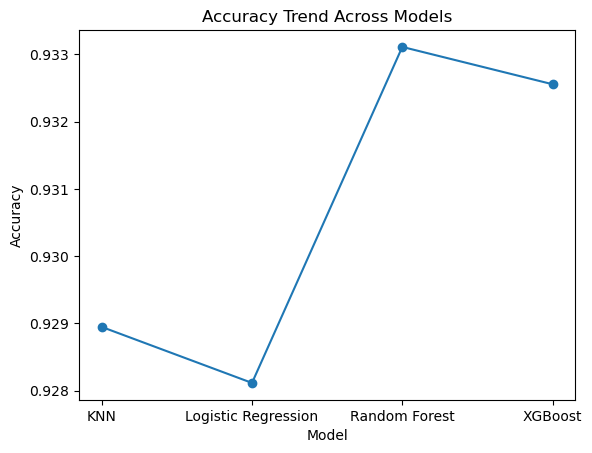

In [74]:
plt.figure()
plt.plot(results_df["Accuracy"], marker="o")
plt.title("Accuracy Trend Across Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()
